In [1]:

import numpy as np
import math, datascience
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib.figure import Figure
#from matplotlib.backends.backend_tkagg import (FigureCanvasTkAGG, NavigationToolbar2Tk)
import pandas as pd
from tkinter import *

In [4]:
plt.style.use('fivethirtyeight')
batters = datascience.Table.read_table('stats.csv')

In [5]:
last_seas = batters.where('year',2022).select('last_name','b_home_run', 'exit_velocity_avg', 'launch_angle_avg').sort('exit_velocity_avg', descending = True)

In [6]:
last_seas = last_seas.relabeled('exit_velocity_avg','ev_avg').relabeled('b_home_run', 'hr').relabeled('launch_angle_avg', 'la_avg')
last_seas.show(10)

last_name,hr,ev_avg,la_avg
Judge,62,95.9,15
Alvarez,37,95.2,12.3
Schwarber,46,93.3,19.2
Devers,27,93.1,11.3
Olson,34,92.9,16.1
Ohtani,34,92.9,12.1
Guerrero Jr.,32,92.8,4.3
Hernandez,25,92.6,11.6
Riley,38,92.5,12.9
Pham,17,92.2,7.7


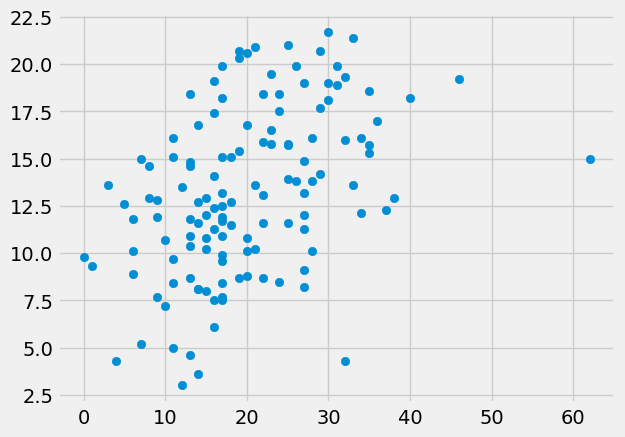

In [7]:
ev_2022 = last_seas.column('ev_avg')
hr_2022 = last_seas.column('hr')
la_2022 = last_seas.column('la_avg')
ev_vs_la = plt.scatter(hr_2022,la_2022)

In [8]:
la_hr_ev_2022 = last_seas.drop('last_name')

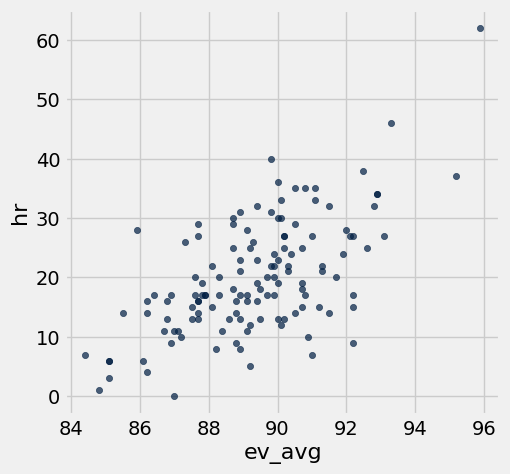

In [ ]:
la_hr_ev_2022.scatter('ev_avg','hr')

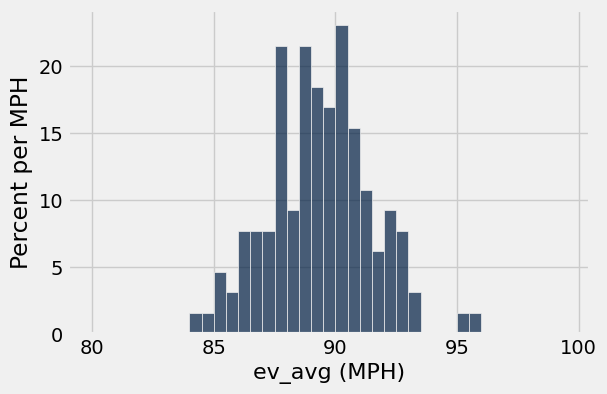

In [ ]:
ev_hist_2022 = last_seas.hist('ev_avg',bins=np.arange(80,100,0.5), unit='MPH')
#ev_hist_2022.label('Average Exit Velocity, 2022')

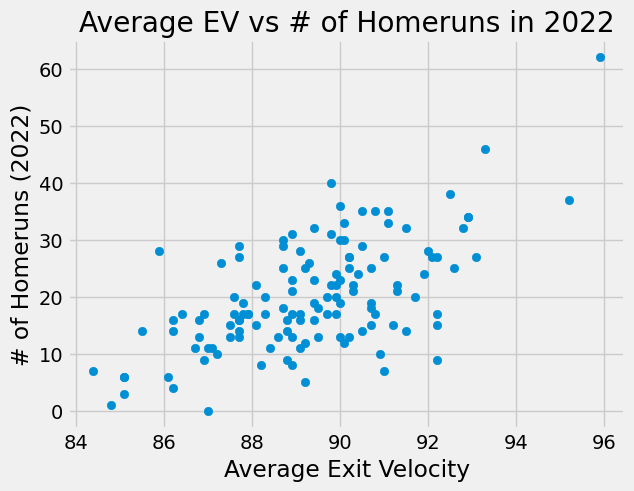

In [9]:
plt.scatter(ev_2022,hr_2022)
plt.xlabel('Average Exit Velocity')
plt.ylabel('# of Homeruns (2022)')
plt.title('Average EV vs # of Homeruns in 2022')
plt.show()

In [10]:
def year_getter(n:int):
    '''
    
    '''
    year = batters.where('year', n)
    return year    

In [11]:
def data_getter():
    '''

    '''
    n = int(input('What year do you want to look at?'))
    x_pt = str(input('x-axis:' ))
    y_pt = str(input('y-axis:'))
    year = year_getter(n)
    x = year.column(x_pt)
    y = year.column(y_pt)
    sctatter = plt.scatter(x,y)
    plt.xlabel(str(x_pt))
    plt.ylabel(str(y_pt))
    plt.title(f'{x_pt} vs {y_pt} in {n}')
    return sctatter


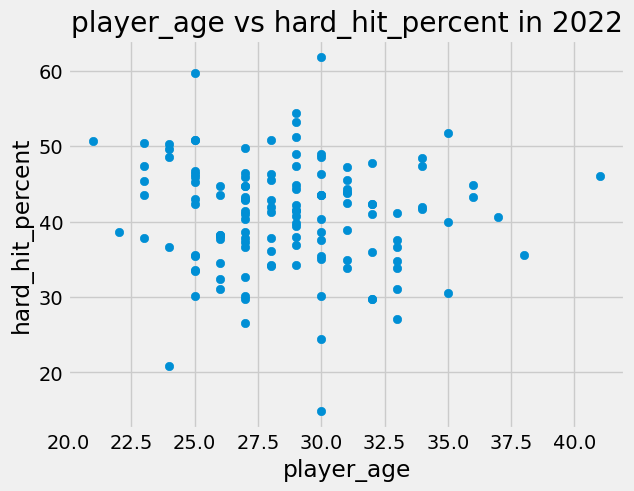

In [14]:
data_getter()